# Cryptocurrency Heatmap and Correlation graph

**Tags:** cryptocurrency, eth, btc, heatmap, finance, trading

Get live data from the web and compute data viz and analysis about different cryptocurrencies.<br> 

#### ⌨ Input: 
datefrom, dateto, the list of cryptocurrencies you need.

#### ⚡ Output:
candlestick chart, correlation heatmap, visual chart for all the currencies.

### Install and import libraries

In [1]:
!pip install yfinance
!pip install seaborn
!pip install mplfinance

import naas
import naas_drivers

import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf 
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import yfinance as yfin


  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
naas 2.1.24 requires pysqlite3==0.4.6, which is not installed.
streamlit 0.82.0 requires click<8.0,>=7.0, but you have click 8.0.3 which is incompatible.
naas 2.1.24 requires requests==2.25.1, but you have requests 2.27.1 which is incompatible.
naas-drivers 0.86.0 requires idna==2.9, but you have idna 2.10 which is incompatible.
naas-drivers 0.86.0 requires numpy==1.19.5, but you have numpy 1.21.2 which is incompatible.


### Create a candlestick chart for a given asset
👉 Completely customize the timeframe and asset you need

[*********************100%***********************]  1 of 1 completed


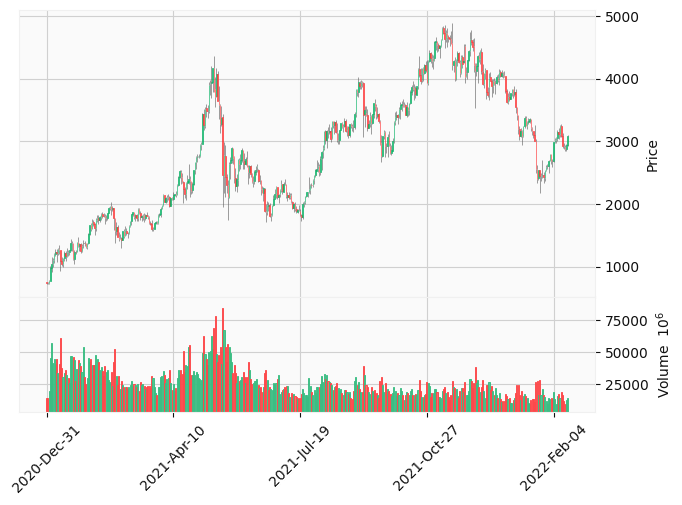

In [2]:
# update date range "start" as desired
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

# insert cryptoasset (in Yahoo format "NNN-CCC" es BTC-EUR or ETH-USD) here
yfin.pdr_override()
data = yfin.download("ETH-USD", start, end)

mpf.plot(data, type="candle", volume=True, style="yahoo")

### Show heatmap and correlation
👉 Insert a range of cryptocurrencies; here you'll have correlation and heatmap

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


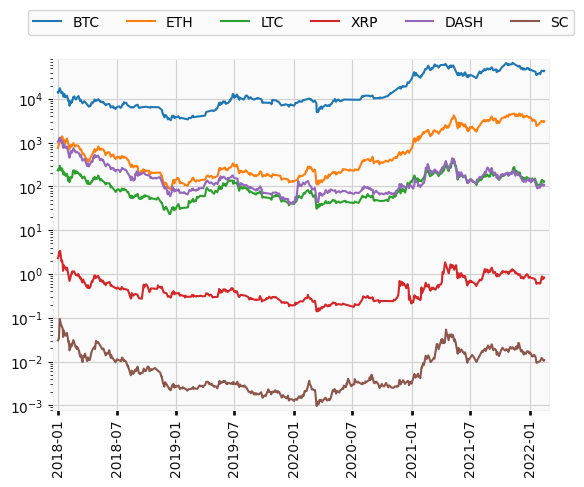

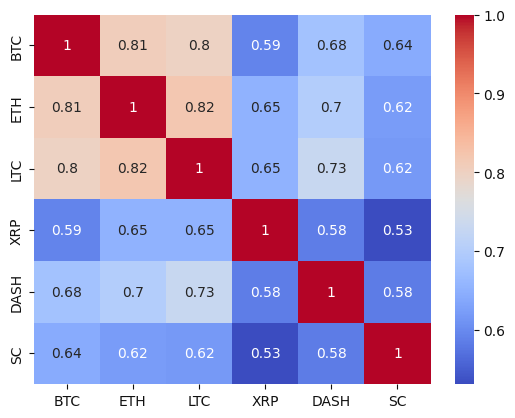

           BTC       ETH       LTC       XRP      DASH        SC
BTC   1.000000  0.806321  0.796980  0.593056  0.678801  0.642281
ETH   0.806321  1.000000  0.819999  0.652044  0.700003  0.620831
LTC   0.796980  0.819999  1.000000  0.651773  0.730316  0.617287
XRP   0.593056  0.652044  0.651773  1.000000  0.584203  0.530784
DASH  0.678801  0.700003  0.730316  0.584203  1.000000  0.583122
SC    0.642281  0.620831  0.617287  0.530784  0.583122  1.000000


In [3]:
# user settings (modify accordingly to Yahoo Finance parameters)
currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

yfin.pdr_override()

# pick your favorite list of cryptocurrencies
crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']
colnames = []

first = True

for ticker in crypto:
    data = yfin.download(f"{ticker}-{currency}", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

plt.yscale('log') # first show linear

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
    
    
plt.tick_params(axis="x", width = 2)
plt.xticks(rotation = "vertical", )
plt.margins(0.01)
plt.subplots_adjust(bottom = 0.15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=False)

plt.show()

# Correlation Heat Map

combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()

print(combined)